In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [105]:
structures = load_hdf_v2(DataManager.get_annotation_filepath(stack='MD590', 
                                                by_human=True,
                               timestamp='latest', suffix='structures'))

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD590" "/home/yuncong/CSHL_labelings_v3/MD590" --exclude "*" --include "*structures*"
latest timestamp:  10132017182823


In [106]:
structures[u'edits']

243845174981039                                                   []
47398112467713                                                    []
65748048783607                                                    []
79036261747890     [{u'username': u'yuncong', u'centroid_m': (48....
82680453469212                                                    []
89407087662583                                                    []
Name: edits, dtype: object

In [107]:
for _, entry in structures.iterrows():
    tf = np.eye(4)
    edits = entry['edits']
    for edit in edits:
        if 'type' in edit and edit['type'] == 'shift3d':
            tf = np.dot(tf, np.vstack([edit['transform'].reshape((3,4)), [0,0,0,1]]))
    print entry['name'], entry['side'], tf[:3,-1]

3N L [ 0.  0.  0.]
3N R [ 0.  0.  0.]
SNC R [ 0.  0.  0.]
PBG L [ 8.76324775 -2.23064488  0.        ]
VLL R [ 0.  0.  0.]
VLL L [ 0.  0.  0.]


In [53]:
d['volume_in_bbox']

233745142425560    [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
Name: volume_in_bbox, dtype: object

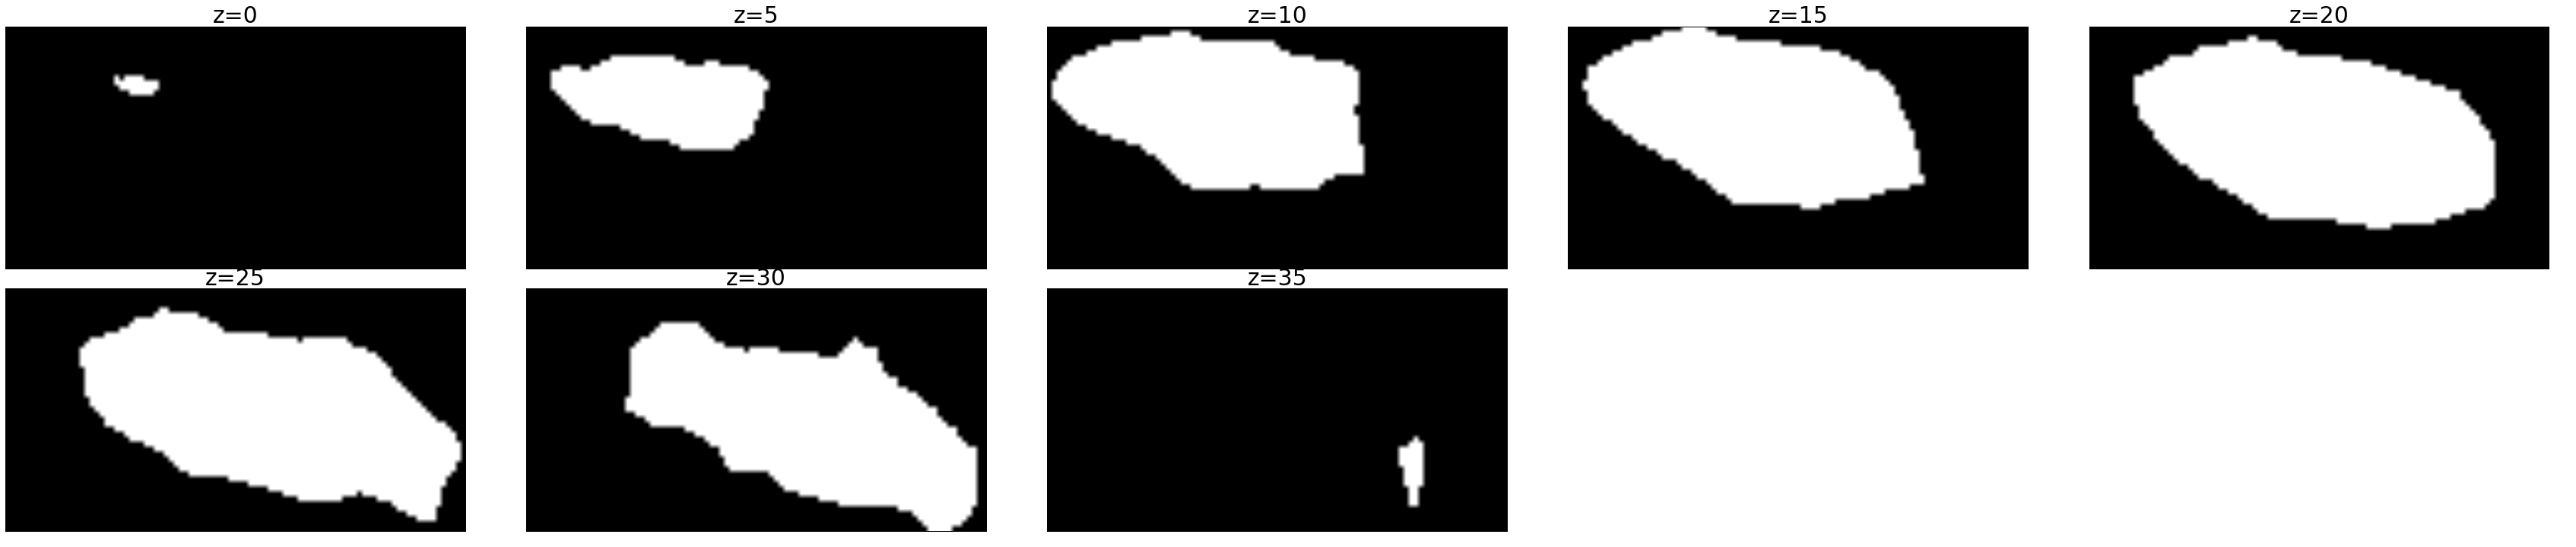

In [55]:
display_volume_sections(d['volume_in_bbox'].values[0], cmap=plt.cm.gray)

In [58]:
v = DataManager.load_original_volume(stack='atlasV5', structure='7N_L', downscale=32)

In [65]:
metadata_cache['section_limits']['MD590']

array([ 82, 343])

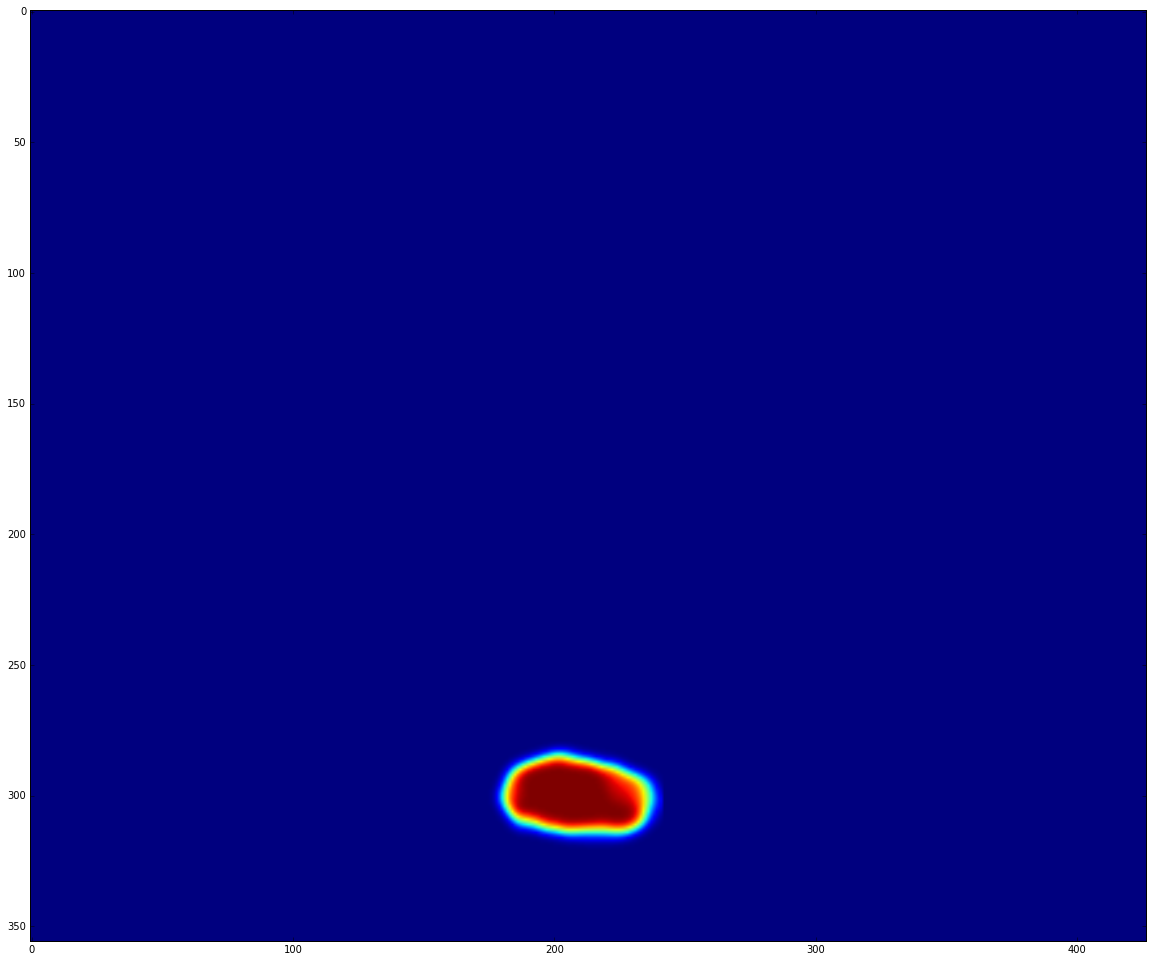

In [64]:
plt.figure(figsize=(20, 20));
plt.imshow(v[...,106]);